In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv ("C:\\Users\\nilli\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")

In [3]:
data.drop("Id", axis = 1, inplace = True)

In [4]:
df= data.copy()

In [5]:
df["GarageYrBlt"].fillna(0, inplace=True)# house with no garage
df["LotFrontage"].fillna(69.0, inplace=True)# filled with median
df["MasVnrArea"].fillna(0, inplace=True) # house with no Masonry veneer
df["GarageCond"].fillna("No Garage", inplace=True)
df["GarageQual"].fillna("No Garage", inplace=True)
df["GarageFinish"].fillna("No Garage", inplace=True)
df["GarageType"].fillna("No Garage", inplace=True)

df["Alley"].fillna("No alley access", inplace=True)
df["MasVnrType"].fillna("None", inplace=True)
df["BsmtQual"].fillna("No Basement", inplace=True)
df["BsmtCond"].fillna("No Basement", inplace=True)
df["BsmtExposure"].fillna("No Basement", inplace=True)
df["BsmtFinType1"].fillna("No Basement", inplace=True)
df["BsmtFinType2"].fillna("No Basement", inplace=True)
df["Electrical"].fillna("SBrkr", inplace=True) ### mode
df["FireplaceQu"].fillna("No Fireplace", inplace=True)
df["PoolQC"].fillna("No Pool", inplace=True)
df["Fence"].fillna("No Fence", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


In [6]:
df['Exterior2nd']=df['Exterior2nd'].str.replace('CmentBd','CemntBd' )
df['Exterior2nd']=df['Exterior2nd'].str.replace('Brk Cmn','BrkComm' )
#trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('BrkComm','Other' )

material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    df['Exterior2nd']=df['Exterior2nd'].str.replace(mat,'Other' )
    
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Other      158
Plywood    142
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [7]:
material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    df['Exterior1st']=df['Exterior1st'].str.replace(mat,'Other' )
    
df['Exterior1st'].value_counts()  

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Other      189
Plywood    108
Name: Exterior1st, dtype: int64

In [8]:
df['Exterior1st2nd'] = pd.Series(len(df['Exterior1st']), index=df.index)
df['Exterior1st2nd'] = df['Exterior1st']
df.loc[df['Exterior1st']!=df['Exterior2nd'],'Exterior1st2nd'] = 'Other'

In [9]:
def fire(x):
    return 1 if x == 0 else 1
df['HaveFireplace'] = df.Fireplaces.apply(fire)

In [10]:
#Removing the outlier
df.drop([523,1298],axis=0,inplace=True)

In [11]:
df['Total_size']= df['BsmtFinSF1']+ df['BsmtFinSF2'] + df['1stFlrSF'] +df['2ndFlrSF']+df['GarageArea']

In [12]:
def helper(x):
    if x.BldgType == "TwnhsE":
        return 'Twnhs'
    else:
        return x.BldgType

df['BldgType_clean']=df.apply(helper,axis=1)

In [13]:
df['Outdoor_Porch_Size']= df['WoodDeckSF']+df['OpenPorchSF']

In [14]:
df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]

In [15]:
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
df['Recent_yr'] = df.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
df['Age_at_sale']=df.apply(time_to_sale,axis=1)

In [16]:
Xh=df[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual",
                   "YrSold",   "SalePrice"]]


In [17]:
Xh["Logprice"] = np.log(Xh["SalePrice"])
Xh["Logprice"]

C:\Users\nilli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Logprice, Length: 1458, dtype: float64

In [18]:
from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( Xh[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
Xh = pd.concat( (Xh.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( Xh[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
Xh = pd.concat( (Xh.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

# # dummify Fireplaces column
# Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
# Fireplaces_enc = Fireplaces_ohe.fit_transform(Xh[['Fireplaces']] )
# Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
# Xh = pd.concat( (Xh.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( Xh[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
Xh = pd.concat( (Xh.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

# #dummify Building Type
# BldgType_clean_ohe = OneHotEncoder( drop='first', sparse = False )
# BldgType_clean_enc = BldgType_clean_ohe.fit_transform( Xh[['BldgType_clean']] )
# BldgType_clean_enc = pd.DataFrame( BldgType_clean_enc, columns=BldgType_clean_ohe.get_feature_names(['BldgType_clean']) )
# Xh = pd.concat( (Xh.drop(["BldgType_clean"], axis=1).reset_index(drop = True), BldgType_clean_enc), axis = 1 )

# #dummify df["HaveFireplace"]
# HaveFireplace_ohe = OneHotEncoder( drop='first', sparse = False )
# HaveFireplace_enc = HaveFireplace_ohe.fit_transform( Xh[["HaveFireplace"]] )
# HaveFireplace_enc = pd.DataFrame( HaveFireplace_enc, columns=HaveFireplace_ohe.get_feature_names(["HaveFireplace"]) )
# Xh = pd.concat( (Xh.drop(["HaveFireplace"], axis=1).reset_index(drop = True), HaveFireplace_enc), axis = 1 )

# #dummify YrSold
YrSold_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
YrSold_enc = YrSold_ohe.fit_transform( Xh[['YrSold']] )
YrSold_enc = pd.DataFrame( YrSold_enc, columns=YrSold_ohe.get_feature_names(['YrSold']) )
Xh = pd.concat( (Xh.drop(["YrSold"], axis=1).reset_index(drop = True), YrSold_enc), axis = 1 )
Xh.head()


Xh.head()

,OverallQual,Total_size,Age_at_sale,SalePrice,Logprice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,7,2964,5,208500,12.247694,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,6,2700,31,181500,12.109011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,7,2880,6,223500,12.317167,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7,2575,36,140000,11.849398,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8,3689,8,250000,12.429216,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
ylh = Xh[["Logprice"]]
Xlh = Xh.drop(["SalePrice", "Logprice"], axis=1)
print(Xlh.shape)
print(ylh.shape)

(1458, 37)
(1458, 1)


In [20]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xhtrain, Xhtest, yhtrain, yhtest = train_test_split( Xlh,ylh, test_size = 0.2  )
print(Xhtrain.shape)
print(yhtrain.shape)

(1166, 37)
(1166, 1)


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xhtrain = pd.DataFrame( ss.fit_transform(Xhtrain), columns = Xhtrain.columns)
Xhtrain.head()

,OverallQual,Total_size,Age_at_sale,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.062929,-0.116190,1.288237,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,-0.193304,-0.280412,...,-0.09759,-0.710293,0.774242,-0.170664,-0.814456,0.981307,-0.547621,1.995722,-0.544974,-0.382765
1,-1.545262,-0.839015,0.612514,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,-0.193304,-0.280412,...,-0.09759,-0.710293,0.774242,-0.170664,-0.814456,0.981307,-0.547621,-0.501072,1.834950,-0.382765
2,-0.804096,-0.084144,1.674364,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,-0.193304,3.566181,...,-0.09759,-0.710293,0.774242,-0.170664,-0.814456,0.981307,-0.547621,1.995722,-0.544974,-0.382765
3,-0.062929,-0.747623,0.757311,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,-0.193304,-0.280412,...,-0.09759,-0.710293,0.774242,-0.170664,-0.814456,0.981307,-0.547621,-0.501072,-0.544974,2.612566
4,2.160570,1.157357,-0.883730,-0.029298,-0.101974,-0.204943,-0.144968,2.925299,-0.193304,-0.280412,...,-0.09759,1.407870,-1.291585,-0.170664,1.227814,-1.019049,1.826081,-0.501072,-0.544974,-0.382765


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lassoh = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.logspace(-6, 0, 100)}
grid_search_lasso = GridSearchCV( estimator=lassoh, param_grid=params, cv=5 )
grid_search_lasso.fit(Xhtrain,yhtrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840...
       7.05480231e-02, 8.11130831e-02, 9.32603347e-02, 1.07226722e-01,
       1.23284674e-01, 1.41747416e-01, 1.62975083e-01, 1.87381742e-01,
       2.15443469e-01, 2.47707636e-01, 2.84803587e-01, 3.27454916e-01,
       3.76493581e-01, 4.32876128e-01, 4.97702356e-01, 5.72236766e-01,
       6.57933225e-01, 7.56463328e-01, 8.69749003e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ver

In [24]:
grid_search_lasso.best_params_

{'alpha': 0.0004037017258596554}

In [25]:
grid_search_lasso.best_score_

0.8638471862796566

In [26]:
lassoh.fit(Xhtest, yhtest).coef_
lst = []
for i in (list(zip(lassoh.fit(Xhtest, yhtest).coef_, Xhtest.columns))):
    lst.append(i)
sorted(lst)

[(-0.004290704226077018, 'Age_at_sale'),
 (-0.0, 'ExterQual_Fa'),
 (0.0, 'ExterQual_Gd'),
 (-0.0, 'ExterQual_TA'),
 (-0.0, 'KitchenQual_Fa'),
 (0.0, 'KitchenQual_Gd'),
 (-0.0, 'KitchenQual_TA'),
 (-0.0, 'Neighborhood_Blueste'),
 (-0.0, 'Neighborhood_BrDale'),
 (-0.0, 'Neighborhood_BrkSide'),
 (-0.0, 'Neighborhood_ClearCr'),
 (0.0, 'Neighborhood_CollgCr'),
 (0.0, 'Neighborhood_Crawfor'),
 (-0.0, 'Neighborhood_Edwards'),
 (0.0, 'Neighborhood_Gilbert'),
 (-0.0, 'Neighborhood_IDOTRR'),
 (-0.0, 'Neighborhood_MeadowV'),
 (-0.0, 'Neighborhood_Mitchel'),
 (-0.0, 'Neighborhood_NAmes'),
 (0.0, 'Neighborhood_NPkVill'),
 (-0.0, 'Neighborhood_NWAmes'),
 (0.0, 'Neighborhood_NoRidge'),
 (0.0, 'Neighborhood_NridgHt'),
 (-0.0, 'Neighborhood_OldTown'),
 (-0.0, 'Neighborhood_SWISU'),
 (-0.0, 'Neighborhood_Sawyer'),
 (-0.0, 'Neighborhood_SawyerW'),
 (0.0, 'Neighborhood_Somerst'),
 (0.0, 'Neighborhood_StoneBr'),
 (-0.0, 'Neighborhood_Timber'),
 (0.0, 'Neighborhood_Veenker'),
 (0.0, 'OverallQual'),
 (0.0, '

In [27]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [28]:
ridge.set_params(alpha=10)
ridge.fit( Xhtrain,yhtrain)
ridge.score( Xhtrain,yhtrain)# 

0.8736942927406315

In [29]:
# from sklearn.metrics import mean_squared_error
# print("R^2: {}".format(ridge.score(Xhtest, yhtest)))
# mse=(mean_squared_error(yhtest, ridge.predict(Xhtest)))
# print("Mean Squared Error: {}".format(mse))
# rmse = np.sqrt(mean_squared_error(yhtest, ridge.predict(Xhtest)))
# print("Root Mean Squared Error: {}".format(rmse)) 

# for i in range(-3, 5):
#     alpha = 10**i
#     ridge.set_params(alpha = alpha)
#     ridge_model = ridge.fit(Xhtrain, yhtrain)
#     preds_ridge = ridge_model.predict(Xhtest)
    
#     plt.scatter(preds_ridge, yhtest, alpha= 0.75, c= 'purple')
#     plt.xlabel('Predicted price')
#     plt.ylabel('Actual price')
#     plt.title('Ridge redularization with alpha {}'.format(alpha))
#     overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(Xhtest, yhtest), mean_squared_error(yhtest, preds_ridge))
#     plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
#     plt.show()

In [30]:
ridge.fit(Xhtrain, yhtrain)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

##from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

In [31]:
test = pd.read_csv ("C:\\Users\\nilli\\Downloads\\test.csv")
test.shape

(1459, 80)

In [32]:
#test.drop("Id", axis = 1, inplace = True)

In [33]:
# dfnum =test1.select_dtypes(include =['float', 'int64'])
# dfnum 
test.shape

(1459, 80)

In [34]:
test.loc[1132, 'GarageYrBlt'] =2007

In [35]:
test['Total_size']= test['BsmtFinSF1']+ test['BsmtFinSF2'] + test['1stFlrSF'] +test['2ndFlrSF']+test['GarageArea']

In [36]:
test.loc[1116,'Total_size'] =test['Total_size'].median()
test.loc[1116,'Total_size']

2305.0

In [37]:
test.loc[660,'Total_size'] =test['Total_size'].median()
test.loc[660,'Total_size']

2305.0

In [38]:
def helper(x):
    if x.BldgType == "TwnhsE":
        return 'Twnhs'
    else:
        return x.BldgType

test['BldgType_clean']=test.apply(helper,axis=1)

In [39]:
test['Outdoor_Porch_Size']= test['WoodDeckSF']+test['OpenPorchSF']

In [40]:
test["AllPorchSF"] = test["OpenPorchSF"] + test["EnclosedPorch"] + test["3SsnPorch"] + test["ScreenPorch"]

In [41]:
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
test['Recent_yr'] = test.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
test['Age_at_sale']=test.apply(time_to_sale,axis=1)

In [42]:
 
test['HaveFireplace'] = test.Fireplaces.apply(fire)

In [43]:
test['Exterior2nd']=test['Exterior2nd'].str.replace('CmentBd','CemntBd' )
test['Exterior2nd']=test['Exterior2nd'].str.replace('Brk Cmn','BrkComm' )
#trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('BrkComm','Other' )

material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    test['Exterior2nd']=df['Exterior2nd'].str.replace(mat,'Other' )
    
test['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    206
Wd Sdng    197
Other      156
Plywood    142
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [44]:
material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    test['Exterior1st']=df['Exterior1st'].str.replace(mat,'Other' )
    
test['Exterior1st'].value_counts()

VinylSd    515
HdBoard    221
MetalSd    220
Wd Sdng    206
Other      187
Plywood    108
Name: Exterior1st, dtype: int64

In [45]:
test['Exterior1st2nd'] = pd.Series(len(test['Exterior1st']), index=test.index)
test['Exterior1st2nd'] = test['Exterior1st']
test.loc[test['Exterior1st']!=test['Exterior2nd'],'Exterior1st2nd'] = 'Other'

In [46]:
test['LotFrontage'].median()

67.0

In [47]:
test["GarageYrBlt"].fillna(0, inplace=True)# house with no garage
test["LotFrontage"].fillna(67.0, inplace=True)# filled with median
test["MasVnrArea"].fillna(0, inplace=True) # house with no Masonry veneer

test['BsmtFinSF1'].fillna(0, inplace=True)
test['BsmtUnfSF'].fillna(0, inplace=True)
test['TotalBsmtSF'].fillna(0, inplace=True)
test['BsmtFullBath'].fillna(0, inplace=True)
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,Total_size,BldgType_clean,Outdoor_Porch_Size,AllPorchSF,Recent_yr,Age_at_sale,HaveFireplace,Exterior1st2nd
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,2238.0,1Fam,140,120,1961,49,1,VinylSd
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,2564.0,1Fam,429,36,1958,52,1,MetalSd
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,2902.0,1Fam,246,34,1998,12,1,VinylSd
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,2676.0,1Fam,396,36,1998,12,1,Other
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,WD,Normal,2049.0,Twnhs,82,226,1992,18,1,VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,1092.0,Twnhs,0,0,1970,36,1,VinylSd
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,WD,Abnorml,1630.0,Twnhs,24,24,1970,36,1,VinylSd
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,WD,Abnorml,3024.0,1Fam,474,0,1996,10,1,Plywood
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,1307.0,1Fam,112,32,1992,14,1,Other


In [48]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [49]:
test["GarageCond"].fillna("No Garage", inplace=True)
test["GarageQual"].fillna("No Garage", inplace=True)
test["GarageFinish"].fillna("No Garage", inplace=True)
test["GarageType"].fillna("No Garage", inplace=True)
test['MSZoning'].fillna("RL", inplace=True)

test["Alley"].fillna("No alley access", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)

test["BsmtQual"].fillna("No Basement", inplace=True)
test["BsmtCond"].fillna("No Basement", inplace=True)
test["BsmtExposure"].fillna("No Basement", inplace=True)
test["BsmtFinType1"].fillna("No Basement", inplace=True)
test["BsmtFinType2"].fillna("No Basement", inplace=True)
test["BsmtFinSF2"].fillna(0, inplace=True)
# test["Electrical"].fillna("SBrkr", inplace=True) ### mode
test["FireplaceQu"].fillna("No Fireplace", inplace=True)
test["PoolQC"].fillna("No Pool", inplace=True)
test["Fence"].fillna("No Fence", inplace=True)
test["MiscFeature"].fillna("None", inplace=True)
test['BsmtHalfBath'].fillna(0, inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)



test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,Total_size,BldgType_clean,Outdoor_Porch_Size,AllPorchSF,Recent_yr,Age_at_sale,HaveFireplace,Exterior1st2nd
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,...,WD,Normal,2238.0,1Fam,140,120,1961,49,1,VinylSd
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,...,WD,Normal,2564.0,1Fam,429,36,1958,52,1,MetalSd
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,...,WD,Normal,2902.0,1Fam,246,34,1998,12,1,VinylSd
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,...,WD,Normal,2676.0,1Fam,396,36,1998,12,1,Other
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,...,WD,Normal,2049.0,Twnhs,82,226,1992,18,1,VinylSd


In [50]:
stats.mode(test['SaleType']).mode

array(['WD'], dtype=object)

In [51]:
test['BsmtHalfBath'].median()

0.0

In [52]:
test1=test[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual",
                   "YrSold"]] 


In [53]:
test1

,Neighborhood,OverallQual,Total_size,KitchenQual,Age_at_sale,ExterQual,YrSold
0,NAmes,5,2238.0,TA,49,TA,2010
1,NAmes,6,2564.0,Gd,52,TA,2010
2,Gilbert,5,2902.0,TA,12,TA,2010
3,Gilbert,6,2676.0,Gd,12,TA,2010
4,StoneBr,8,2049.0,Gd,18,Gd,2010
...,...,...,...,...,...,...,...
1454,MeadowV,4,1092.0,TA,36,TA,2006
1455,MeadowV,4,1630.0,TA,36,TA,2006
1456,Mitchel,5,3024.0,TA,10,TA,2006
1457,Mitchel,5,1307.0,TA,14,TA,2006


In [54]:
#  def fire(x):
# #     return 1 if x == 0 else 1
# # df['HaveFireplace'] = train.Fireplaces.apply(fire)
# # test['enc_condition'] = test.Fireplaces.apply(fire)

In [55]:
#Dummifying Neighborhood, ExterQual, KitchenQual, and Fireplaces columns

from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( test1[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
test1 = pd.concat( (test1.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( test1[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
test1 = pd.concat( (test1.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

# # dummify Fireplaces column
# Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
# Fireplaces_enc = Fireplaces_ohe.fit_transform(test1[['Fireplaces']] )
# Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
# test1 = pd.concat( (test1.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( test1[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
test1 = pd.concat( (test1.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )


# # dummify RoofStyle column
# RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
# RoofStyle_enc = RoofStyle_ohe.fit_transform( test1[['RoofStyle']] )
# RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
# test1 = pd.concat( (test1.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )
# test1.head()

# #dummify Exterior1st Column
# Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
# Exterior1st_enc = Exterior1st_ohe.fit_transform(test1[['Exterior1st']] )
# Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
# test1 = pd.concat( (test1.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )


# #dummify Exterior2nd Column
# Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
# Exterior2nd_enc = Exterior2nd_ohe.fit_transform( test1[['Exterior2nd']] )
# Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
# test1 = pd.concat( (test1.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )

# #dummify df["HaveFireplace"]
# HaveFireplace_ohe = OneHotEncoder( drop='first', sparse = False )
# HaveFireplace_enc = HaveFireplace_ohe.fit_transform( test1[["HaveFireplace"]] )
# HaveFireplace_enc = pd.DataFrame( HaveFireplace_enc, columns=HaveFireplace_ohe.get_feature_names(["HaveFireplace"]) )
# test1 = pd.concat( (test1.drop(["HaveFireplace"], axis=1).reset_index(drop = True), HaveFireplace_enc), axis = 1 )

# #dummify Foundation Column
# Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
# Foundation_enc = Foundation_ohe.fit_transform( test1[['Foundation']] )
# Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
# test1 = pd.concat( (test1.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )

# #dummify Building Type
# BldgType_clean_ohe = OneHotEncoder( drop='first', sparse = False )
# BldgType_clean_enc = BldgType_clean_ohe.fit_transform( test1[['BldgType_clean']] )
# BldgType_clean_enc = pd.DataFrame( BldgType_clean_enc, columns=BldgType_clean_ohe.get_feature_names(['BldgType_clean']) )
# test1 = pd.concat( (test1.drop(["BldgType_clean"], axis=1).reset_index(drop = True), BldgType_clean_enc), axis = 1 )


#dummify YrSold
YrSold_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
YrSold_enc = YrSold_ohe.fit_transform( test1[['YrSold']] )
YrSold_enc = pd.DataFrame( YrSold_enc, columns=YrSold_ohe.get_feature_names(['YrSold']) )
test1 = pd.concat( (test1.drop(["YrSold"], axis=1).reset_index(drop = True), YrSold_enc), axis = 1 )
test1.head()

# #dummify Heating QC Column
# HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
# HeatingQC_enc = HeatingQC_ohe.fit_transform( test1[['HeatingQC']] )
# HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
# test1 = pd.concat( (test1.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )

test1.head()

,OverallQual,Total_size,Age_at_sale,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,5,2238.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,6,2564.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5,2902.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,6,2676.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8,2049.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
# X
# X_cols = X.columns
# test1_cols = test1.columns
# diff = X_cols.difference(test1_cols)
# diff

In [57]:
test.columns[test.isnull().any()]

Index([], dtype='object')

In [58]:
# ridge_model.predict(test1)

In [59]:
ypredictions = np.exp(lassoh.predict(test1))
ypredictions

array([137654.80617473, 152875.92581505, 205067.41455194, ...,
       216152.89232951, 114279.94761645, 246189.98082405])

In [60]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [61]:
submission['SalePrice'] = ypredictions
submission.head()

,Id,SalePrice
0,1461,137654.806175
1,1462,152875.925815
2,1463,205067.414552
3,1464,188992.753829
4,1465,146862.253483


In [62]:
submission.shape

(1459, 2)

In [63]:
submission.to_csv('submission6.csv', index=False)

In [64]:
test[test.GarageYrBlt>2010]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,Total_size,BldgType_clean,Outdoor_Porch_Size,AllPorchSF,Recent_yr,Age_at_sale,HaveFireplace,Exterior1st2nd


In [65]:
test.loc[1132, 'GarageYrBlt'] =2007

In [66]:
df[df.GarageYrBlt>2010]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,Exterior1st2nd,HaveFireplace,Total_size,BldgType_clean,Outdoor_Porch_Size,AllPorchSF,Recent_yr,Age_at_sale


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

In [68]:
pca = PCA()
X_reduced = pca.fit_transform(scale(Xh))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:5]

(39, 39)


,0,1,2,3,4,5
0,0.338041,-0.128445,0.047532,0.036316,0.002161,-0.049928
1,0.268187,-0.350898,0.185730,0.004957,0.061280,0.046514
2,-0.287761,-0.096483,0.205831,-0.025352,0.086708,0.049754
3,0.337549,-0.256396,0.186982,-0.005045,0.021043,-0.025150
4,0.351580,-0.249777,0.085955,-0.000232,0.022275,-0.029621


In [69]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(1458, 39)


,0,1,2,3,4,5
0,2.747460,1.512332,-1.423252,0.541441,1.983286,-0.594204
1,-0.610350,-1.507658,0.181918,-3.028453,-0.410419,-2.324752
2,2.831753,1.450634,-1.381458,0.538728,1.989256,-0.606303
3,-0.012449,-0.118841,0.318467,-0.944749,0.036031,-0.846642
4,3.925964,-0.509864,0.738134,-0.218471,2.214855,0.339716


In [70]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 16.31,  21.39,  25.37,  28.91,  32.29,  35.56,  38.51,  41.37,
        44.17,  46.95,  49.7 ,  52.43,  55.14,  57.83,  60.51,  63.17,
        65.81,  68.44,  71.06,  73.68,  76.29,  78.88,  81.46,  84.01,
        86.48,  88.91,  91.02,  92.95,  94.62,  96.01,  97.08,  97.93,
        98.61,  99.26,  99.6 ,  99.8 ,  99.9 ,  99.97, 100.  ])

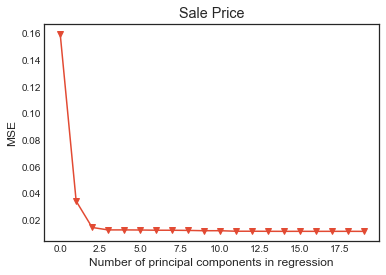

In [71]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=0)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), ylh.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], ylh.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sale Price')
plt.xlim(xmin=-1);

In [72]:
regr_test = LinearRegression()
regr_test.fit(X_reduced, ylh)
regr_test.coef_

array([[ 1.40483910e-01, -9.98056474e-02,  3.43458484e-02,
        -9.25178825e-05,  8.90059129e-03, -1.18358659e-02,
         4.57081639e-03,  1.05359506e-02, -1.49016122e-02,
        -1.71017129e-03, -1.95476578e-02, -6.23097300e-03,
         8.02326619e-03, -5.79670351e-03, -1.67976564e-04,
         4.98902411e-03, -1.80875330e-03,  4.47524736e-03,
         7.99180236e-03, -7.89120004e-03, -5.88506453e-03,
         8.57479285e-03,  1.44806267e-03, -1.73328943e-03,
        -4.97200112e-03,  6.00816055e-03,  6.42456628e-03,
         4.01780399e-02,  5.12736204e-02,  3.69417370e-02,
        -2.05166218e-02,  1.35149790e-02, -4.91403816e-03,
         2.26867446e-02,  1.42212751e-01, -1.55658194e-01,
        -1.40676544e-01, -2.37075914e-01, -1.01137695e-02]])

C:\Users\nilli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


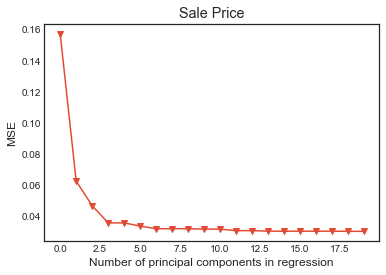

In [73]:
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(Xhtrain))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), yhtrain, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], yhtrain, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sale Price')
plt.xlim(xmin=-1);
plt.savefig('MSE of the Principal Components Regression.png')

In [74]:
X_reduced_test = pca2.transform(scale(Xhtest))[:,:18]
# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:18], yhtrain)

#Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(yhtest, pred)

0.0330093211202205

In [75]:
pred = regr.predict(pca2.transform(scale(test1))[:,:18])
#mean_squared_error(yhtest, pred)



In [76]:
np.exp(pred)

array([[131623.90085202],
       [160198.79845073],
       [153604.36225898],
       ...,
       [161235.64637409],
       [130666.13281845],
       [189560.34252197]])

In [77]:
ypredictions=np.exp(pred)
ypredictions

array([[131623.90085202],
       [160198.79845073],
       [153604.36225898],
       ...,
       [161235.64637409],
       [130666.13281845],
       [189560.34252197]])

In [78]:
submissionPCRh = pd.DataFrame()
submissionPCRh['Id'] = test.Id

In [79]:
submissionPCRh['SalePrice'] = ypredictions
submissionPCRh.head()

,Id,SalePrice
0,1461,131623.900852
1,1462,160198.798451
2,1463,153604.362259
3,1464,176070.298959
4,1465,235451.061719


In [80]:
# submissionPCR.shape

In [81]:
submissionPCRh.to_csv('submission7.csv', index=False)